# CME 193 - Lecture 3 


## Assignment 1
Assignment 1 is out, it is notebook form. You need to fill in the answers in the cells and produce graphs. It involves markov models, but everything needed for the assignment is explained in the notebook. It is due on **Feb 1st 5pm**. If you have any questions, come to the office hours on thursday.

Today we will cover the following

1. Walk through of implementing the power method.
2. Classes and objects in python

## Power method

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using `numpy.linalg.eigh`

The power method uses iterated matrix-vector multiplication to find the largest eigenvalue of $A$.  
```
input: A - n x n symmetric matrix
output: v, lam - vector of length n and eigenvalue

v = random vector of length n
v = v/||v||_2
while not converged:
    v = A*v
    v = v/||v||_2
    
lam = v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

In [2]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la
import matplotlib.pyplot as plt

In [131]:
def power_method(A,tol = 1e-3):
    """
    Runs the power method on the input matrix A
    
    Params:
        A - A square symmetrix matrix
        tol - tolerance for checking convergance
    """
    x = rnd.rand(A.shape[0])
    x = x/la.norm(x)
    err = np.inf
    eigvals = [err]
    while err>tol:
        x = np.dot(A,x)
        x = x/la.norm(x)
        eigvals += [np.dot(x,np.dot(A,x))]
        err = abs(eigvals[-2]-eigvals[-1])

    eigvals = eigvals[1:]
    return eigvals

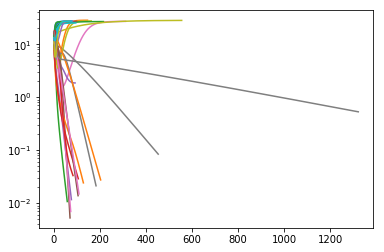

In [135]:
n=100
mats = []
errors = []
for i in range(30):
    A = rnd.randn(n,n)
    A = (A+A.T)/2
    mats += [A]
    eigvals = power_method(A);
    s,_ = la.eigh(A)
    plt.semilogy(np.abs(np.array(eigvals) - s[-1]))
    errors += [abs(eigvals[-1]-s[-1])]

In [139]:
errors = np.array(errors)
mats = np.array(mats)

In [171]:
mats.shape

(30, 100, 100)

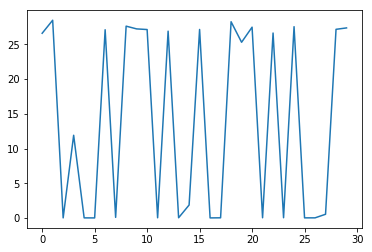

In [223]:
plt.plot(errors)

In [222]:
err=np.median(errors)
idxs = np.where(errors>err)[0]
mats[idxs,:,:].shape

(15, 100, 100)

In [168]:
power_method(A);


# Classes/Object Oriented Programming

The basic goal of classes is to give you a way to abstract away details when you program.  For instance, NumPy gave you an `array` class, which allowed you to store and pass around a large amount of information using a single variable, and perform a variety of operations on that variable (methods) without needing to implement them yourself.

Many programming languages have the ability to accomplish similar levels of abstraction, although not all use the same terminology.

Classes you've already seen:
* Integers
* Floats
* Lists
* NumPy Arrays
* PyPlot - Figures, Axes, etc.

When you want to make your own class, you need to write a class definition.  Then you can create objects using that class definition.

In [174]:
# -- minimal example...
# define class:
class Leaf: 
    pass # there is no information in this class
# instantiate object
leaf = Leaf()

print(leaf)
print(type(leaf))
print(isinstance(leaf, Leaf)) # checks class membership

<class '__main__.Leaf'>
True


To put information in your class, add an initialization method

In [175]:
import numpy as np
a = np.array([1,2,3])
a

array([1, 2, 3])

In [179]:
# example
class Leaf(object):
    def __init__(self, c1):
        self.color = c1 # private attribute 
    
redleaf = Leaf('red')
blueleaf = Leaf('blue')

print(blueleaf.color) # access the attribute using .

blue


## Class Hierarchy

A natural thing to think about as it relates to classes is the notion of *hierarchy*. We imbue the notion of hierarchy through something called *inheritance*.

An example:

* Animal
  * Bird
    * Hawk 
    * Seagull
    * ...
  * Dog
    * Shiba Inu
    * Golden Retriever
    * ...
  * ...

In [180]:
# lets define an *abstract* base class.

class Animal(object):
    def __init__(self, n_legs, color):
        self.n_legs = n_legs 
        self.color = color
        
    def make_noise(self): 
        print('noise')

In [181]:
# lets define some classes that will inherit
class Dog(Animal): # note we use (Animal), not (object)
    def __init__(self, color, name):
        Animal.__init__(self, 4, color) # 4 legs
        self.name = name 
        
    def make_noise(self):
        print(self.name + ': ' + 'woof')

In [204]:
class Bird(Animal):
    def __init__(self, color, name, has_wings=True, can_fly=True):
        Animal.__init__(self, 2, color) # 2 legs
        self.name = name
        self.has_wings = has_wings
        self.can_fly = can_fly
    def __repr__(self):
        return "Bird:"+self.name

In [190]:
# noise
brutus = Bird('black', 'Brutus',True, False)
brutus.make_noise()
brutus.n_legs = 3
brutus.n_legs
brutus.can_fly

Brutus: chirp!


False

In [201]:
shelly = Bird('white', 'Shelly')
shelly.make_noise()
shelly.can_fly

noise


True

In [205]:
1.0/3

0.3333333333333333

There are some standard methods that one may want to overload / implement:

* `__init__`: Constructor
* `__repr__`: Represent the object (machine) 
* `__str__`: Represent the object (human) and gets called when you `print`
    
these `__method__` looking functions are built into Python!

## Example: Rational Numbers

Here we'l make a class that holds rational numbers (fractions).  That is, numbers of the form
$$r = \frac{p}{q}$$
where $p$ and $q$ are integers

In [206]:
# from numpy import gcd
from math import gcd

class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = int(gcd(p, q)) # because numpy returns a float
        
        self.p = p // g # integer division
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)


In [207]:
a = Rational(6, 4)
b = Rational(3, 2)

print(type(a))
print("a = ",a)
print("b = ",b)
print([a,b])
print("float(a) = ", float(a))

<class '__main__.Rational'>
a =  3 / 2
b =  3 / 2
[<__main__.Rational object at 0x7faf3a6964e0>, <__main__.Rational object at 0x7faf3a6961d0>]
float(a) =  1.5


You can do cool things like overload math operators.  This lets you write code that looks like you would write math.  Recall

$$ \frac{p_1}{q_1} + \frac{p_2}{q_2} = \frac{p_1 q_2 + p_2 q_1}{q_1 q_2}$$

In [208]:
class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = int(gcd(p, q)) # because numpy returns a float
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals - interprets self + other
    def __add__(self, other): # that's two underscores "_" on each side
        '''
        this is R + X, where R is rational and X is another number
        '''
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if its an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other): # interprets other + self
        '''
        this is X + R, where R is rational and X is not rational
        '''
        return self + other # addition commutes!
    

In [209]:
r = Rational(3)
print(r)

3 / 1


In [211]:
r = Rational(3, 2)
print('Integer adding:')
print('right add')
print(r + 4)
print(float(r + 4))
print('left add')
print(4 + r)
print(float(4 + r))

Integer adding:
right add
11 / 2
5.5
left add
11 / 2
5.5


# Exercise 1

### Create another class

Implement a class to do modular arithmetic
* $a + b = (a + b) \mod N$
* $a * b = (a * b) \mod N$

You can either:
* Choose a value for $N$ and hard-code it into your class
* Specify $N$ for each object you create.
    * make sure two objects are in the same ring when you do arithmetic!

### Add more operations to `Rational`
You can read about the available operations that you can overload [here](https://docs.python.org/3.3/reference/datamodel.html#emulating-numeric-types)

Add the following operations to the `Rational` class:
* `*` - use `__mul__` (and `__rmul__`)
* `/` - use `__truediv__` (and `__rtruediv__`)
* `-` - use `__sub__` (and `__rsub__`)

You only need to define these operations between two `Rational` types - use an `isinstance(other, Rational)` block.

Note that the `__r<op>__` methods only need to be overloaded if you want to interact with another class.

Make a few examples to convince yourself that this works.



In [212]:
from math import gcd
class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = int(gcd(p, q)) # because numpy returns a float
        
        self.p = p // g
        self.q = q // g
    
    # method to convert rational to float
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    # method to convert rational to string for printing
    def __str__(self):
        return '%d / %d' % (self.p, self.q)
    
    # method to add two rationals
    def __add__(self, other): # that's two underscores "_" on each side
        '''
        this is R + X, where R is rational and X is another number
        '''
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if its an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other):
        '''
        this is X + R, where R is rational and X is not rational
        '''
        return self + other # addition commutes!
    
    # subtraction
    def __sub__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q - other.p * self.q, self.q * other.q)
    
    # multiplication
    def __mul__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.p, self.q * other.q)
        
    # division
    def __truediv__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q, self.q * other.p)
        if isinstance(other, int):
            return Rational(self.p , self.q * other)

In [213]:
a = Rational(3,2)
b = Rational(3,2)
print(a + b)
print(a - b)
print(a * b)
print(a / b)

3 / 1
0 / 1
9 / 4
1 / 1


## Application of the rational class

In [217]:
x = Rational(24)

### Quick algorithm to compute the square root of a number

Here we quickly implement the [Babylonian Method](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method)

In [224]:
y = x/2
for i in range(5):
    y = (y + x/y)/2;
print(y)
float(y)

80746825394092993 / 16482376713731824


4.898979485575103

In [216]:
np.sqrt(24)

4.898979485566356